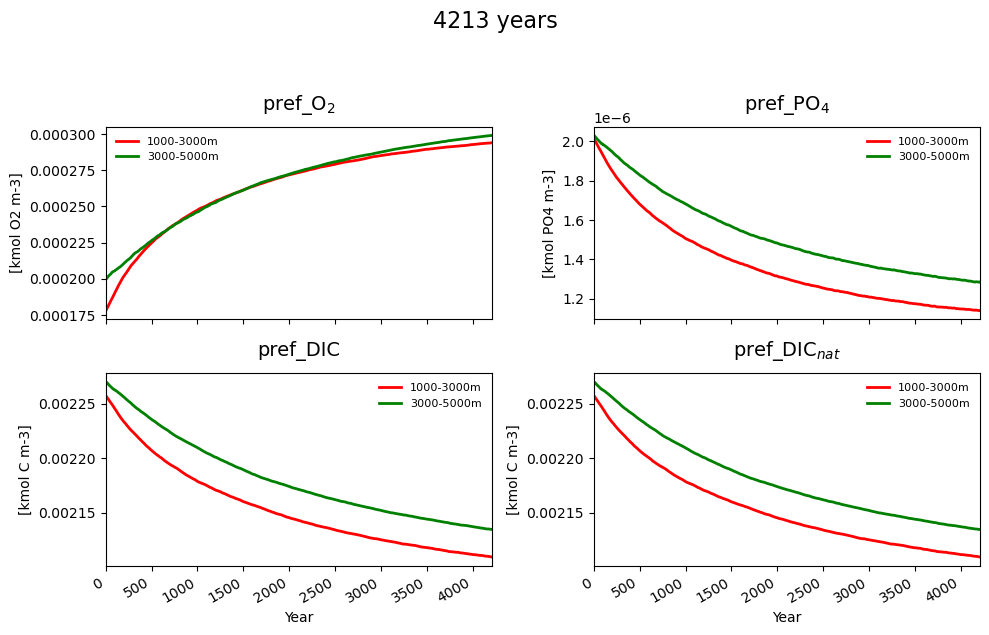

In [1]:
import xarray as xr
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd

infile    = "/work/uo1451/m301158/MPI-ESM/data/test_flat10/raw/preform_spinup/"
outfile   = "/work/uo1451/m301158/MPI-ESM/image/"

f1 = nc.Dataset(infile+"preform_spinup_1000-3000m_avg_1850-6062.nc", 'r') # exp1
pref_O2_1=f1.variables['preformed_O2'][:]
pref_PO4_1=f1.variables['preformed_PO4'][:]
pref_DIC_1=f1.variables['preformed_DIC'][:]
pref_DICnat_1=f1.variables['preformed_DICnat'][:]

pref_O2_1_mean=np.mean(pref_O2_1,axis=(1,2))
pref_PO4_1_mean=np.mean(pref_PO4_1,axis=(1,2))
pref_DIC_1_mean=np.mean(pref_DIC_1,axis=(1,2))
pref_DICnat_1_mean=np.mean(pref_DICnat_1,axis=(1,2))

f2 = nc.Dataset(infile+"preform_spinup_3000-5000m_avg_1850-6062.nc", 'r') # exp2
pref_O2_2=f2.variables['preformed_O2'][:]
pref_PO4_2=f2.variables['preformed_PO4'][:]
pref_DIC_2=f2.variables['preformed_DIC'][:]
pref_DICnat_2=f2.variables['preformed_DICnat'][:]

pref_O2_2_mean=np.mean(pref_O2_2,axis=(1,2))
pref_PO4_2_mean=np.mean(pref_PO4_2,axis=(1,2))
pref_DIC_2_mean=np.mean(pref_DIC_2,axis=(1,2))
pref_DICnat_2_mean=np.mean(pref_DICnat_2,axis=(1,2))

plot_data=[
    ('pref_O$_2$',[pref_O2_1_mean,pref_O2_2_mean],"[kmol O2 m-3]"),
    ('pref_PO$_4$',[pref_PO4_1_mean,pref_PO4_2_mean],'[kmol PO4 m-3]'),
    ('pref_DIC',[pref_DIC_1_mean,pref_DIC_2_mean],'[kmol C m-3]'),
    ('pref_DIC$_{nat}$',[pref_DICnat_1_mean,pref_DICnat_2_mean],'[kmol C m-3]')
]
colors=['red','green']
labels=['1000-3000m','3000-5000m']
x=np.arange(1,4213,1)

fig,axes = plt.subplots(2,2,figsize=(10,6))
axes = axes.flatten()

for i, (title,datasets,ylabel) in enumerate (plot_data):
    ax=axes[i]
    for data, color,label in zip (datasets,colors,labels):
        ax.plot(x,data,color=color,linewidth=2.,label=label)
    ax.set_title(title,pad=12,fontsize=14)
    ax.set_xlim(0,len(x)-1)
    ax.set_xlabel('Year')
    ax.set_ylabel(ylabel)
    ax.legend(fontsize=8,frameon=False)

fig.autofmt_xdate()
plt.suptitle("4213 years",fontsize=16,y=1.05)
plt.tight_layout()
plt.savefig(outfile+"preformed_spinup_timeseries_1850-6062.png")
plt.show(block=False)
